Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [61]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
plt.style.use("fivethirtyeight")

%matplotlib inline
%config InlineBackend.figure_format = "svg"
rcParams["figure.figsize"] = 5, 3

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [4]:
from sklearn.datasets import load_boston

In [35]:
X = pd.DataFrame(load_boston()["data"], columns=load_boston()["feature_names"])

In [36]:
X.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
y = pd.DataFrame(load_boston()["target"], columns=["target_price"])

In [38]:
y.head(5)

,target_price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
scaler = StandardScaler()

In [41]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

In [44]:
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [46]:
y_train = pd.DataFrame(scaler.fit_transform(y_train), columns=y_train.columns)

In [47]:
y_test = pd.DataFrame(scaler.fit_transform(y_test), columns=y_test.columns)

In [58]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [59]:
X_train_tsne = tsne.fit_transform(X_train)

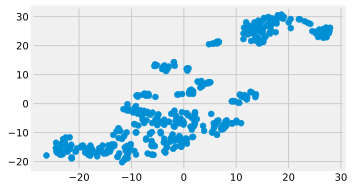

In [60]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

### Задание 2


С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [66]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [68]:
X_train_kmean = kmeans.fit_predict(X_train)

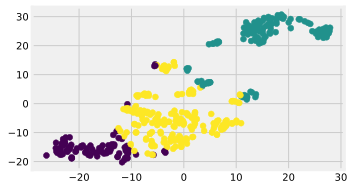

In [76]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_kmean)

In [95]:
X_train = pd.concat([X_train,
                     y_train,
                     pd.DataFrame(X_train_kmean, columns=["clusters"])
                    ],
                    axis=1)

In [99]:
X_train.groupby(["clusters"])["target_price", "CRIM"].mean()

,target_price,CRIM
clusters,,
0,0.535571,-0.398864
1,-0.711455,0.810904
2,0.231915,-0.359594


### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [100]:
X_test_kmeans = kmeans.predict(X_test)

In [103]:
X_test = pd.concat([X_test,
                    y_test,
                    pd.DataFrame(X_test_kmeans, columns=["clusters"])],
                  axis=1)

In [105]:
X_test.groupby(["clusters"])["target_price", "CRIM"].mean()

,target_price,CRIM
clusters,,
0,0.808710,-0.478394
1,-0.589839,0.880322
2,0.063394,-0.450813
